<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/AutoTS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet

In [3]:
# finaldf = pd.read_csv('predictions.csv')

In [4]:
import datetime
days = 300
Previous_Date = datetime.datetime.today() - datetime.timedelta(days=days)

In [5]:
ticker = '^NSEI'
# ^NSEI, ^NSEBANK
df = yf.download(ticker, start = Previous_Date)
# ,start='2020-01-01'

[*********************100%***********************]  1 of 1 completed


In [6]:
df.reset_index(inplace = True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-30 00:00:00+05:30,17468.150391,17522.500000,17387.199219,17498.250000,17498.250000,505000
1,2022-03-31 00:00:00+05:30,17519.199219,17559.800781,17435.199219,17464.750000,17464.750000,281100
2,2022-04-01 00:00:00+05:30,17436.900391,17703.699219,17422.699219,17670.449219,17670.449219,291800
3,2022-04-04 00:00:00+05:30,17809.099609,18114.650391,17791.400391,18053.400391,18053.400391,345500
4,2022-04-05 00:00:00+05:30,18080.599609,18095.449219,17921.550781,17957.400391,17957.400391,283500


In [8]:
df.shape

(206, 7)

In [9]:
df.sort_values('Date', inplace = True)

In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
201,2023-01-18 00:00:00+05:30,18074.300781,18183.750000,18032.449219,18165.349609,18165.349609,255800
202,2023-01-19 00:00:00+05:30,18119.800781,18155.199219,18063.750000,18107.849609,18107.849609,237800
203,2023-01-20 00:00:00+05:30,18115.599609,18145.449219,18016.199219,18027.650391,18027.650391,237200
204,2023-01-23 00:00:00+05:30,18118.449219,18162.599609,18063.449219,18118.550781,18118.550781,202500
205,2023-01-24 00:00:00+05:30,18183.949219,18201.250000,18078.650391,18118.300781,18118.300781,0


In [11]:
# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
# %matplotlib notebook

In [12]:
split = int(round(len(df)*0.7,0))
train_data = df.iloc[:split]
test_data = df.iloc[split:]

In [13]:
split

144

## Forecasting using Auto TS

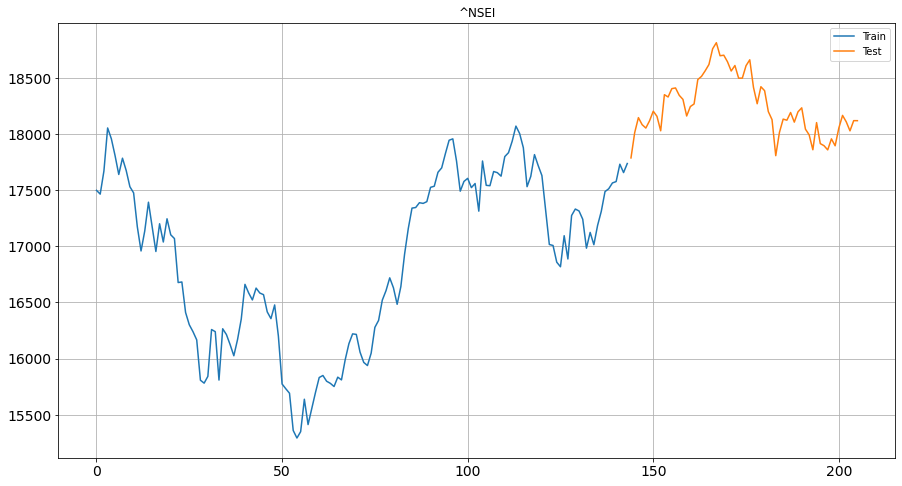

In [14]:
train_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Train')
test_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

In [15]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 674.5/674.5 KB 12.3 MB/s eta 0:00:00


In [16]:
from autots import AutoTS

In [22]:
model = AutoTS(forecast_length=3, frequency='infer',  ensemble='simple', drop_data_older_than_periods=split, validation_method='backwards')

In [23]:
mod = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model DatepartRegression in generation 0 of 10
Epoch 1/50
5/5 [==============================] - 6s 7ms/step - loss: 0.3911
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3816
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3806
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3808
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3740
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3727
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3712
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3675
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.3650
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3598
Epoch 11/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3581
Epoch 12/50
5/5 [==============================] - 0s 7ms/step - loss: 0.3525
Epoc

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError('Column ds has timezone specified, which is not supported. Remove timezone.') in model 38: FBProphet
Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/api.py)") in model 49: ARDL
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 with model UnivariateMotif in generation 0 of 10
Model Number: 54 with model SectionalMotif in generation 0 of 10
Model Number: 55 with model Sectional

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive 

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 96 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 96: VAR
Model Number: 97 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 97: DatepartRegression
Model Number: 98 with model MetricMotif in generation 0 of 10
Model Number: 99 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 99: VAR
Model Number: 100 with model GLM in generation 0 of 10
Model Number: 101 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 101: ARCH
Model Number: 102 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 102: VAR
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model UnobservedComponents in generation 0

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 123 with model Theta in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 126: GLM
Model Number: 127 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 127: ARIMA
Model Number: 128 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 128: VAR
Model Number: 129 with model Theta in generation 0 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 130 with model SeasonalNaive in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 132: ARCH
Model Number: 133 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 133: VECM
Model Number: 134 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 134: VAR
Model Number: 135 with model MetricMotif in generation 0 of 10
Model Number: 136 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 136: VECM
Model Number: 137 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog 

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Template Eval Error: ValueError('Only gave one variable to VECM') in model 162: VECM
Model Number: 163 with model MultivariateMotif in generation 0 of 10
Model Number: 164 with model UnivariateMotif in generation 0 of 10
Model Number: 165 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 165: ARIMA
Model Number: 166 with model AverageValueNaive in generation 0 of 10
Model Number: 167 with model MultivariateMotif in generation 0 of 10
Model Number: 168 with model Theta in generation 0 of 10
Model Number: 169 with model GLM in generation 0 of 10
Model Number: 170 with model UnivariateMotif in generation 0 of 10
Model Number: 171 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 171: ARDL
Model Number: 172 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed fro

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model LastValueNaive in generation 0 of 10
Model Number: 183 with model DatepartRegression in generation 0 of 10
Model Number: 184 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 184: ARIMA
Model Number: 185 with model MultivariateRegression in generation 0 of 10
Model Number: 186 with model AverageValueNaive in generation 0 of 10
Model Number: 187 with model ETS in generation 0 of 10
Model Number: 188 with model ETS in generation 0 of 10
ETS failed on Close with ValueError('could not broadcast input array from shape (141,) into shape (364,)')
New Generation: 1 of 10
Model Number: 189 with model GLS in generation 1 of 10
Model Number: 190 with model SectionalMotif in generation 1 of 10
Model Number: 191 with model ARIMA in generation 1 of 10
Model Number: 192 with model ARIMA in generation 1 of 10
Model Numbe

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 209 with model ARIMA in generation 1 of 10
Model Number: 210 with model UnivariateMotif in generation 1 of 10
Model Number: 211 with model MultivariateRegression in generation 1 of 10
Model Number: 212 with model LastValueNaive in generation 1 of 10
Model Number: 213 with model Theta in generation 1 of 10
Model Number: 214 with model GLM in generation 1 of 10
No anomalies detected.
Model Number: 215 with model SectionalMotif in generation 1 of 10
Model Number: 216 with model UnobservedComponents in generation 1 of 10
Model Number: 217 with model GLS in generation 1 of 10
Model Number: 218 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 218: ARIMA
Model Number: 219 with model Theta in generation 1 of 10
Model Number: 220 with model Theta in generation 1 of 10
Model Number: 221 with model GLM in generation 1 of 10
Model Number: 222 with model GLS in generation 1 of 10
Model Number: 2

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 248 with model DatepartRegression in generation 1 of 10
Model Number: 249 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 249: DatepartRegression
Model Number: 250 with model AverageValueNaive in generation 1 of 10
Model Number: 251 with model MultivariateMotif in generation 1 of 10
Model Number: 252 with model AverageValueNaive in generation 1 of 10
Model Number: 253 with model ETS in generation 1 of 10
Model Number: 254 with model LastValueNaive in generation 1 of 10
Model Number: 255 with model ETS in generation 1 of 10
Model Number: 256 with model ARIMA in generation 1 of 10
Model Number: 257 with model UnivariateMotif in generation 1 of 10
Model Number: 258 with model DatepartRegression in generation 1 of 10
Model Number: 259 with model Theta in generation 1 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 260 with model DatepartRegression in generation 1 of 10
Model Number: 261 with model ETS in generation 1 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 262 with model ARIMA in generation 1 of 10
Model Number: 263 with model GLM in generation 1 of 10
No anomalies detected.
Model Number: 264 with model LastValueNaive in generation 1 of 10
Model Number: 265 with model UnivariateRegression in generation 1 of 10
Model Number: 266 with model LastValueNaive in generation 1 of 10
Model Number: 267 with model WindowRegression in generation 1 of 10
Model Number: 268 with model NVAR in generation 1 of 10
Model Number: 269 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 269: MultivariateRegression
Model Number: 270 with model AverageValueNaive in generation 1 of 10
Model Number: 271 with model LastValueNaive in generation 1 of 10
Model Number: 272 with model MetricMotif in generation 1 of 10
Model Number: 273 with model AverageValueNaive in generation 1 of 10
Model Number: 274 with model MultivariateRegression in generation 

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Model Number: 282 with model SeasonalNaive in generation 1 of 10
Model Number: 283 with model UnivariateMotif in generation 1 of 10
Model Number: 284 with model ARIMA in generation 1 of 10
Model Number: 285 with model UnivariateMotif in generation 1 of 10
Model Number: 286 with model ConstantNaive in generation 1 of 10
Model Number: 287 with model LastValueNaive in generation 1 of 10
Model Number: 288 with model Theta in generation 1 of 10
Model Number: 289 with model Theta in generation 1 of 10
Model Number: 290 with model ETS in generation 1 of 10
Model Number: 291 with model UnivariateMotif in generation 1 of 10
Model Number: 292 with model MultivariateMotif in generation 1 of 10
Model Number: 293 with model Theta in generation 1 of 10
Model Number: 294 with model ETS in generation 1 of 10
Model Number: 295 with model AverageValueNaive in generation 1 of 10
Model Number: 296 with model UnivariateMotif in generation 1 of 10
Model Number: 297 with model DatepartRegression in generatio

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 298 with model ConstantNaive in generation 1 of 10
Model Number: 299 with model ARIMA in generation 1 of 10
Model Number: 300 with model ARIMA in generation 1 of 10
Model Number: 301 with model Theta in generation 1 of 10
Model Number: 302 with model SeasonalNaive in generation 1 of 10
No anomalies detected.
Model Number: 303 with model ARIMA in generation 1 of 10
Model Number: 304 with model AverageValueNaive in generation 1 of 10
Model Number: 305 with model GLM in generation 1 of 10
Model Number: 306 with model UnobservedComponents in generation 1 of 10
Model Number: 307 with model MultivariateMotif in generation 1 of 10
Model Number: 308 with model SectionalMotif in generation 1 of 10
Model Number: 309 with model ConstantNaive in generation 1 of 10
Model Number: 310 with model ETS in generation 1 of 10
Model Number: 311 with model GLS in generation 1 of 10
Model Number: 312 with model NVAR in generation 1 of 10
Model Number: 313 with model UnobservedComponents in gene

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


New Generation: 2 of 10
Model Number: 314 with model Theta in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 314: Theta
Model Number: 315 with model Theta in generation 2 of 10
Model Number: 316 with model ETS in generation 2 of 10
Model Number: 317 with model DatepartRegression in generation 2 of 10
No anomalies detected.
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 317: DatepartRegression
Model Number: 318 with model MetricMotif in generation 2 of 10
Model Number: 319 with model GLM in generation 2 of 10
Model Number: 320 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 320: ConstantNaive
Model Number: 321 with model WindowRegression in generation 2 of 10
Model Number: 322 with model LastValueNaive in generation 2 of 10
Model Number: 323 with model UnivariateMotif in generation 2 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 324 with model MultivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 324: MultivariateMotif
Model Number: 325 with model ETS in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 325: ETS
Model Number: 326 with model LastValueNaive in generation 2 of 10
Model Number: 327 with model LastValueNaive in generation 2 of 10
Model Number: 328 with model MetricMotif in generation 2 of 10
Model Number: 329 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 329: ARIMA
Model Number: 330 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 330: DatepartRegression
Model Number: 331 with model LastValueNaive in generation 2 of 10
Model Number: 332 with model ETS in generation 2 of 10
Model Number: 333 with model ARIMA in generati

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Epoch 1/100
4/4 [==============================] - 11s 290ms/step - loss: 154092312522306493796581376.0000 - val_loss: 15582420123056777954590720.0000
Epoch 2/100
4/4 [==============================] - 0s 49ms/step - loss: 131580413340213384017084416.0000 - val_loss: 15582420123056777954590720.0000
Epoch 3/100
4/4 [==============================] - 0s 55ms/step - loss: 169366991378589098335797248.0000 - val_loss: 15582420123056777954590720.0000
Epoch 4/100
4/4 [==============================] - 0s 56ms/step - loss: 154339139181384764451979264.0000 - val_loss: 15582420123056777954590720.0000
Epoch 5/100
4/4 [==============================] - 0s 50ms/step - loss: 180581984586105999593570304.0000 - val_loss: 15582420123056777954590720.0000
Epoch 6/100
4/4 [==============================] - 0s 52ms/step - loss: 208281892188349367943430144.0000 - val_loss: 15582420123056777954590720.0000
Epoch 7/100
4/4 [==============================] - 0s 49ms/step - loss: 148563057783536682230874112.0000

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 405 with model ETS in generation 2 of 10
Model Number: 406 with model UnivariateMotif in generation 2 of 10
Model Number: 407 with model GLS in generation 2 of 10
Model Number: 408 with model LastValueNaive in generation 2 of 10
Model Number: 409 with model ETS in generation 2 of 10
Model Number: 410 with model AverageValueNaive in generation 2 of 10
Model Number: 411 with model GLS in generation 2 of 10
Model Number: 412 with model SeasonalNaive in generation 2 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 413 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 413: ConstantNaive
Model Number: 414 with model GLM in generation 2 of 10
Model Number: 415 with model UnobservedComponents in generation 2 of 10
Model Number: 416 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 416: MultivariateRegression
Model Number: 417 with model AverageValueNaive in generation 2 of 10
Model Number: 418 with model AverageValueNaive in generation 2 of 10
Model Number: 419 with model NVAR in generation 2 of 10
Model Number: 420 with model MultivariateMotif in generation 2 of 10
Model Number: 421 with model DatepartRegression in generation 2 of 10
Model Number: 422 with model NVAR in generation 2 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 423 with model ARIMA in generation 2 of 10
Model Number: 424 with model ARIMA in generation 2 of 10
Model Number: 425 with model SectionalMotif in generation 2 of 10
Model Number: 426 with model GLS in generation 2 of 10
Model Number: 427 with model Theta in generation 2 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 428 with model ARIMA in generation 2 of 10
Model Number: 429 with model GLS in generation 2 of 10
Model Number: 430 with model DatepartRegression in generation 2 of 10
Model Number: 431 with model SectionalMotif in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 431: SectionalMotif
Model Number: 432 with model LastValueNaive in generation 2 of 10
Model Number: 433 with model UnivariateRegression in generation 2 of 10
Model Number: 434 with model GLS in generation 2 of 10
Model Number: 435 with model MultivariateRegression in generation 2 of 10
Model Number: 436 with model UnivariateMotif in generation 2 of 10
Model Number: 437 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 437: MultivariateRegression
Model Number: 438 with model SectionalMotif in generation 2 of 10
New Generation: 3 of 10
Model Numbe

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 449 with model LastValueNaive in generation 3 of 10
Model Number: 450 with model Theta in generation 3 of 10
Model Number: 451 with model SeasonalNaive in generation 3 of 10
Model Number: 452 with model ARIMA in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 452: ARIMA
Model Number: 453 with model GLS in generation 3 of 10
Model Number: 454 with model GLS in generation 3 of 10
Model Number: 455 with model AverageValueNaive in generation 3 of 10
Model Number: 456 with model GLS in generation 3 of 10
Model Number: 457 with model LastValueNaive in generation 3 of 10
Model Number: 458 with model UnobservedComponents in generation 3 of 10
Model Number: 459 with model NVAR in generation 3 of 10
Model Number: 460 with model GLS in generation 3 of 10
Model Number: 461 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 461: GLM
Model Number: 462 with m

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 484 with model SectionalMotif in generation 3 of 10
No anomalies detected.
Model Number: 485 with model UnivariateRegression in generation 3 of 10
Model Number: 486 with model AverageValueNaive in generation 3 of 10
Model Number: 487 with model ETS in generation 3 of 10
Model Number: 488 with model UnivariateMotif in generation 3 of 10
Model Number: 489 with model AverageValueNaive in generation 3 of 10
Model Number: 490 with model ARIMA in generation 3 of 10
Model Number: 491 with model GLM in generation 3 of 10
Model Number: 492 with model ETS in generation 3 of 10
Model Number: 493 with model MultivariateMotif in generation 3 of 10
Model Number: 494 with model ARIMA in generation 3 of 10
Model Number: 495 with model ARIMA in generation 3 of 10
Model Number: 496 with model UnobservedComponents in generation 3 of 10
Model Number: 497 with model MultivariateMotif in generation 3 of 10
Model Number: 498 with model ETS in generation 3 of 10
Model Number: 499 with model NVAR

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 504 with model ARIMA in generation 3 of 10
Model Number: 505 with model ConstantNaive in generation 3 of 10
Model Number: 506 with model AverageValueNaive in generation 3 of 10
Model Number: 507 with model MetricMotif in generation 3 of 10
Model Number: 508 with model AverageValueNaive in generation 3 of 10
Model Number: 509 with model LastValueNaive in generation 3 of 10
Model Number: 510 with model UnivariateMotif in generation 3 of 10
Model Number: 511 with model NVAR in generation 3 of 10
Model Number: 512 with model UnobservedComponents in generation 3 of 10
Model Number: 513 with model AverageValueNaive in generation 3 of 10
Model Number: 514 with model MetricMotif in generation 3 of 10
Model Number: 515 with model SeasonalNaive in generation 3 of 10
Model Number: 516 with model SectionalMotif in generation 3 of 10
Model Number: 517 with model GLM in generation 3 of 10
Template Eval Error: PerfectSeparationError('Perfect separation detected, results not available') 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 520 with model MultivariateRegression in generation 3 of 10
Model Number: 521 with model UnivariateMotif in generation 3 of 10
Model Number: 522 with model UnivariateMotif in generation 3 of 10
Model Number: 523 with model NVAR in generation 3 of 10
Model Number: 524 with model Theta in generation 3 of 10
Model Number: 525 with model MetricMotif in generation 3 of 10
Model Number: 526 with model MultivariateMotif in generation 3 of 10
Model Number: 527 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 527: DatepartRegression
Model Number: 528 with model NVAR in generation 3 of 10
Model Number: 529 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 529: DatepartRegression
Model Number: 530 with model NVAR in generation 3 of 10
Model Number: 531 with model UnivariateMotif in generation 3 of 10
Model Nu

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 537 with model Theta in generation 3 of 10
Model Number: 538 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 538: ETS
Model Number: 539 with model ETS in generation 3 of 10
Model Number: 540 with model MultivariateRegression in generation 3 of 10
Model Number: 541 with model SeasonalNaive in generation 3 of 10
Model Number: 542 with model UnobservedComponents in generation 3 of 10
Model Number: 543 with model NVAR in generation 3 of 10
Model Number: 544 with model Theta in generation 3 of 10
Model Number: 545 with model MetricMotif in generation 3 of 10
Model Number: 546 with model MultivariateMotif in generation 3 of 10
Model Number: 547 with model GLS in generation 3 of 10
Model Number: 548 with model NVAR in generation 3 of 10
Model Number: 549 with model UnivariateMotif in generation 3 of 10
Model Number: 550 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 551 with model ETS in generation 3 of 10
Model Number: 552 with model MultivariateRegression in generation 3 of 10
Model Number: 553 with model Theta in generation 3 of 10
Model Number: 554 with model ARIMA in generation 3 of 10
Model Number: 555 with model LastValueNaive in generation 3 of 10
Model Number: 556 with model MetricMotif in generation 3 of 10
Model Number: 557 with model MultivariateMotif in generation 3 of 10
Model Number: 558 with model SectionalMotif in generation 3 of 10
Model Number: 559 with model UnivariateMotif in generation 3 of 10
Model Number: 560 with model ConstantNaive in generation 3 of 10
Model Number: 561 with model MetricMotif in generation 3 of 10
Model Number: 562 with model GLS in generation 3 of 10
Model Number: 563 with model MetricMotif in generation 3 of 10


/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


New Generation: 4 of 10
Model Number: 564 with model MultivariateRegression in generation 4 of 10
Model Number: 565 with model SeasonalNaive in generation 4 of 10
Model Number: 566 with model UnivariateMotif in generation 4 of 10
Model Number: 567 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 567: DatepartRegression
Model Number: 568 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 569 with model MetricMotif in generation 4 of 10
Model Number: 570 with model GLS in generation 4 of 10
Model Number: 571 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 571: ARIMA
Model Number: 572 with model UnivariateMotif in generation 4 of 10
Model Number: 573 with model NVAR in generation 4 of 10
Model Number: 574 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 574: ETS
Model Number: 575 with model LastValueNaive in generation 4 of 10
Model Number: 576 with model WindowRegression in generation 4 of 10
Model Number: 577 with model Theta in generation 4 of 10
Model Number: 578 with model NVAR in generation 4 of 10
Model Number: 579 with model AverageValueNaive in generation 4 of 10
Model Number: 580 with model ARIMA in generation 4 of 10
Model Number: 581 with model UnivariateRegression in generation 4 of 1

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 586 with model SeasonalNaive in generation 4 of 10
Model Number: 587 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 587: ARIMA
Model Number: 588 with model SeasonalNaive in generation 4 of 10
Model Number: 589 with model ARIMA in generation 4 of 10
Model Number: 590 with model GLM in generation 4 of 10
Model Number: 591 with model MetricMotif in generation 4 of 10
Model Number: 592 with model AverageValueNaive in generation 4 of 10
Model Number: 593 with model GLS in generation 4 of 10
Model Number: 594 with model SeasonalNaive in generation 4 of 10
Model Number: 595 with model Theta in generation 4 of 10
Model Number: 596 with model MultivariateMotif in generation 4 of 10
Model Number: 597 with model UnivariateMotif in generation 4 of 10
Model Number: 598 with model ETS in generation 4 of 10
No anomalies detected.
Model Number: 599 with model AverageValueNaive in generation 4 of 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 667 with model SeasonalNaive in generation 4 of 10
Model Number: 668 with model NVAR in generation 4 of 10
Model Number: 669 with model Theta in generation 4 of 10
Model Number: 670 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 670: GLM
Model Number: 671 with model GLS in generation 4 of 10
Model Number: 672 with model UnivariateMotif in generation 4 of 10
Model Number: 673 with model NVAR in generation 4 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value e

Model Number: 674 with model ETS in generation 4 of 10
Model Number: 675 with model LastValueNaive in generation 4 of 10
Model Number: 676 with model AverageValueNaive in generation 4 of 10
Model Number: 677 with model SectionalMotif in generation 4 of 10
Model Number: 678 with model ConstantNaive in generation 4 of 10
Model Number: 679 with model UnivariateMotif in generation 4 of 10
Model Number: 680 with model MetricMotif in generation 4 of 10
Model Number: 681 with model UnivariateMotif in generation 4 of 10
Model Number: 682 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 682: MultivariateRegression
Model Number: 683 with model LastValueNaive in generation 4 of 10
Model Number: 684 with model MultivariateMotif in generation 4 of 10
Model Number: 685 with model MetricMotif in generation 4 of 10


/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Model Number: 686 with model WindowRegression in generation 4 of 10
Model Number: 687 with model ARIMA in generation 4 of 10
Model Number: 688 with model WindowRegression in generation 4 of 10
New Generation: 5 of 10
Model Number: 689 with model NVAR in generation 5 of 10
Model Number: 690 with model MultivariateRegression in generation 5 of 10
Model Number: 691 with model WindowRegression in generation 5 of 10
Model Number: 692 with model LastValueNaive in generation 5 of 10
Model Number: 693 with model UnivariateRegression in generation 5 of 10
Model Number: 694 with model ARIMA in generation 5 of 10
Model Number: 695 with model ETS in generation 5 of 10
Model Number: 696 with model Theta in generation 5 of 10
Model Number: 697 with model MultivariateMotif in generation 5 of 10
Model Number: 698 with model NVAR in generation 5 of 10
Model Number: 699 with model ETS in generation 5 of 10
Model Number: 700 with model SectionalMotif in generation 5 of 10
Model Number: 701 with model Uni

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 737 with model WindowRegression in generation 5 of 10
Model Number: 738 with model UnivariateMotif in generation 5 of 10
Model Number: 739 with model Theta in generation 5 of 10
Model Number: 740 with model LastValueNaive in generation 5 of 10
Model Number: 741 with model MultivariateMotif in generation 5 of 10
Model Number: 742 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 742: MultivariateRegression
Model Number: 743 with model NVAR in generation 5 of 10
Model Number: 744 with model GLM in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 744: GLM
Model Number: 745 with model SeasonalNaive in generation 5 of 10
Model Number: 746 with model NVAR in generation 5 of 10
Model Number: 747 with model UnivariateMotif in generation 5 of 10
Model Number: 748 with model DatepartRegression in generation 5 of 10
Template Eval Err

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 800 with model SectionalMotif in generation 6 of 10
Model Number: 801 with model MultivariateRegression in generation 6 of 10
Model Number: 802 with model MultivariateMotif in generation 6 of 10
Model Number: 803 with model WindowRegression in generation 6 of 10
Model Number: 804 with model UnivariateMotif in generation 6 of 10
Model Number: 805 with model ARIMA in generation 6 of 10
Model Number: 806 with model SectionalMotif in generation 6 of 10
Model Number: 807 with model ARIMA in generation 6 of 10
Model Number: 808 with model GLS in generation 6 of 10
Model Number: 809 with model AverageValueNaive in generation 6 of 10
Model Number: 810 with model UnivariateMotif in generation 6 of 10
Model Number: 811 with model WindowRegression in generation 6 of 10
Model Number: 812 with model ConstantNaive in generation 6 of 10
Model Number: 813 with model GLM in generation 6 of 10
Model Number: 814 with model Theta in generation 6 of 10
Model Number: 815 with model Theta in ge

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 820 with model NVAR in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 820: NVAR
Model Number: 821 with model DatepartRegression in generation 6 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 822 with model DatepartRegression in generation 6 of 10
Model Number: 823 with model AverageValueNaive in generation 6 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 824 with model GLS in generation 6 of 10
Model Number: 825 with model MetricMotif in generation 6 of 10
Model Number: 826 with model MultivariateMotif in generation 6 of 10
Model Number: 827 with model UnivariateMotif in generation 6 of 10
Model Number: 828 with model UnivariateMotif in generation 6 of 10
Model Number: 829 with model MultivariateRegression in generation 6 of 10
Epoch 1/50
18/18 [==============================] - 7s 38ms/step - loss: 278.5353
Epoch 2/50
18/18 [==============================] - 1s 39ms/step - loss: 223.9915
Epoch 3/50
18/18 [==============================] - 1s 40ms/step - loss: 180.7115
Epoch 4/50
18/18 [==============================] - 1s 38ms/step - loss: 198.0523
Epoch 5/50
18/18 [==============================] - 1s 38ms/step - loss: 183.7437
Epoch 6/50
18/18 [==============================] - 1s 39ms/step - loss: 147.3048
Epoch 7/50
18/18 [==============================] - 1s 39ms/step - loss: 177.3502
Epoch 8/50
18/18 [=============

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 860 with model SeasonalNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 860: SeasonalNaive
Model Number: 861 with model MultivariateRegression in generation 6 of 10
Epoch 1/50
18/18 [==============================] - 7s 26ms/step - loss: 28.9522
Epoch 2/50
18/18 [==============================] - 0s 27ms/step - loss: 8.3664
Epoch 3/50
18/18 [==============================] - 1s 28ms/step - loss: 6.7371
Epoch 4/50
18/18 [==============================] - 0s 27ms/step - loss: 8.0075
Epoch 5/50
18/18 [==============================] - 0s 28ms/step - loss: 7.9409
Epoch 6/50
18/18 [==============================] - 1s 27ms/step - loss: 6.9002
Epoch 7/50
18/18 [==============================] - 0s 27ms/step - loss: 6.8770
Epoch 8/50
18/18 [==============================] - 1s 27ms/step - loss: 6.1410
Epoch 9/50
18/18 [==============================] - 0s 26ms/step - loss: 6.5021
Epoch 10/50
18/18 [=========================

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 919 with model UnivariateRegression in generation 7 of 10
Model Number: 920 with model MetricMotif in generation 7 of 10
Model Number: 921 with model SectionalMotif in generation 7 of 10
Model Number: 922 with model ConstantNaive in generation 7 of 10
Model Number: 923 with model WindowRegression in generation 7 of 10
Model Number: 924 with model NVAR in generation 7 of 10
Model Number: 925 with model MultivariateMotif in generation 7 of 10
Model Number: 926 with model Theta in generation 7 of 10
Model Number: 927 with model AverageValueNaive in generation 7 of 10
Model Number: 928 with model ConstantNaive in generation 7 of 10
Model Number: 929 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 929: DatepartRegression
Model Number: 930 with model MultivariateMotif in generation 7 of 10
Model Number: 931 with model SectionalMotif in generation 7 of 10
Model Number: 932 with 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 946 with model LastValueNaive in generation 7 of 10
Model Number: 947 with model UnivariateMotif in generation 7 of 10
Model Number: 948 with model SeasonalNaive in generation 7 of 10
Model Number: 949 with model MetricMotif in generation 7 of 10
Model Number: 950 with model AverageValueNaive in generation 7 of 10
Model Number: 951 with model LastValueNaive in generation 7 of 10
Model Number: 952 with model AverageValueNaive in generation 7 of 10
Model Number: 953 with model NVAR in generation 7 of 10
Model Number: 954 with model MultivariateRegression in generation 7 of 10
Epoch 1/50
18/18 [==============================] - 6s 28ms/step - loss: 268.4081
Epoch 2/50
18/18 [==============================] - 1s 28ms/step - loss: 149.2260
Epoch 3/50
18/18 [==============================] - 1s 28ms/step - loss: 187.2081
Epoch 4/50
18/18 [==============================] - 0s 27ms/step - loss: 129.9530
Epoch 5/50
18/18 [==============================] - 0s 27ms/step - loss: 135.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarnin

Model Number: 963 with model AverageValueNaive in generation 7 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was

Template Eval Error: Exception('Transformer BTCD failed on fit') in model 963: AverageValueNaive
Model Number: 964 with model DatepartRegression in generation 7 of 10
Model Number: 965 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 965: NVAR
Model Number: 966 with model ARIMA in generation 7 of 10
Model Number: 967 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 968 with model NVAR in generation 7 of 10
Model Number: 969 with model SeasonalNaive in generation 7 of 10
Model Number: 970 with model GLM in generation 7 of 10
Model Number: 971 with model Theta in generation 7 of 10
Model Number: 972 with model ARIMA in generation 7 of 10
Model Number: 973 with model GLM in generation 7 of 10
Model Number: 974 with model MetricMotif in generation 7 of 10
Model Number: 975 with model UnivariateMotif in generation 7 of 10
Model Number: 976 with model WindowRegression in generation 7 of 10
Model Number: 977 with model SeasonalNaive in generation 7 of 10
Model Number: 978 with model LastValueNaive in generation 7 of 10
Model Number: 979 with model SectionalMotif in generation 7 of 10
Model Number: 980 with model MetricMotif in generation 7 of 10
Model Number: 981 with model UnivariateRegression in generation 7 of 10
Model Number: 982 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration f

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


New Generation: 8 of 10
Model Number: 989 with model NVAR in generation 8 of 10
Model Number: 990 with model MetricMotif in generation 8 of 10
Model Number: 991 with model UnivariateRegression in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 991: UnivariateRegression
Model Number: 992 with model MultivariateMotif in generation 8 of 10
Model Number: 993 with model MultivariateMotif in generation 8 of 10
Model Number: 994 with model Theta in generation 8 of 10
Model Number: 995 with model GLS in generation 8 of 10
Model Number: 996 with model DatepartRegression in generation 8 of 10
Epoch 1/50
5/5 [==============================] - 4s 5ms/step - loss: 552.3652
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 551.0632
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 550.6095
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 550.2720
Epoch 5/50
5/5 [==============================

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1042 with model ConstantNaive in generation 8 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1043 with model MultivariateMotif in generation 8 of 10
Model Number: 1044 with model ConstantNaive in generation 8 of 10
Model Number: 1045 with model SeasonalNaive in generation 8 of 10
Model Number: 1046 with model SectionalMotif in generation 8 of 10
Model Number: 1047 with model NVAR in generation 8 of 10
Model Number: 1048 with model ETS in generation 8 of 10
Model Number: 1049 with model UnivariateMotif in generation 8 of 10
Model Number: 1050 with model ConstantNaive in generation 8 of 10
Model Number: 1051 with model UnivariateMotif in generation 8 of 10
Model Number: 1052 with model ARIMA in generation 8 of 10
Model Number: 1053 with model LastValueNaive in generation 8 of 10
Model Number: 1054 with model WindowRegression in generation 8 of 10
No anomalies detected.
Model Number: 1055 with model ARIMA in generation 8 of 10
Model Number: 1056 with model UnobservedComponents in generation 8 of 10
Model Number: 1057 with model UnivariateMotif in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1079 with model UnobservedComponents in generation 8 of 10
Model Number: 1080 with model ConstantNaive in generation 8 of 10
Model Number: 1081 with model AverageValueNaive in generation 8 of 10
Model Number: 1082 with model DatepartRegression in generation 8 of 10
Model Number: 1083 with model GLS in generation 8 of 10
Model Number: 1084 with model ETS in generation 8 of 10
Model Number: 1085 with model Theta in generation 8 of 10
Model Number: 1086 with model SectionalMotif in generation 8 of 10
Model Number: 1087 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/polyint.py:545: RuntimeWarning: overflow encountered in multiply
  self.wi[:j] *= (self.xi[j]-self.xi[:j])
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/polyint.py:546: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/polyint.py:643: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


Model Number: 1088 with model Theta in generation 8 of 10
New Generation: 9 of 10
Model Number: 1089 with model MultivariateMotif in generation 9 of 10
Model Number: 1090 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1090: DatepartRegression
Model Number: 1091 with model Theta in generation 9 of 10
Model Number: 1092 with model ETS in generation 9 of 10
Model Number: 1093 with model SeasonalNaive in generation 9 of 10
Model Number: 1094 with model MetricMotif in generation 9 of 10
Model Number: 1095 with model GLS in generation 9 of 10
Model Number: 1096 with model SeasonalNaive in generation 9 of 10
Model Number: 1097 with model ConstantNaive in generation 9 of 10
Model Number: 1098 with model UnivariateMotif in generation 9 of 10
Model Number: 1099 with model ARIMA in generation 9 of 10
Model Number: 1100 with model WindowRegression in generation 9 of 10
Model Number: 1101 with mod

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T



Model Number: 1102 with model GLM in generation 9 of 10
Model Number: 1103 with model UnivariateRegression in generation 9 of 10
Model Number: 1104 with model AverageValueNaive in generation 9 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1105 with model Theta in generation 9 of 10
Model Number: 1106 with model ConstantNaive in generation 9 of 10
Model Number: 1107 with model NVAR in generation 9 of 10
Model Number: 1108 with model SeasonalNaive in generation 9 of 10
Model Number: 1109 with model MultivariateMotif in generation 9 of 10
Model Number: 1110 with model Theta in generation 9 of 10
Model Number: 1111 with model NVAR in generation 9 of 10
Model Number: 1112 with model NVAR in generation 9 of 10
Model Number: 1113 with model GLM in generation 9 of 10
Model Number: 1114 with model GLM in generation 9 of 10
Model Number: 1115 with model DatepartRegression in generation 9 of 10
Epoch 1/50
6/6 [==============================] - 8s 122ms/step - loss: 1498457.5000 - val_loss: 483582.2500
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 751202.1875 - val_loss: 82597.3984
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 637403.5625 - val_loss: 171881.3750
Epoch 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1117 with model WindowRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1118 with model ConstantNaive in generation 9 of 10
Model Number: 1119 with model ConstantNaive in generation 9 of 10
Model Number: 1120 with model SectionalMotif in generation 9 of 10
Model Number: 1121 with model MetricMotif in generation 9 of 10
Model Number: 1122 with model MetricMotif in generation 9 of 10
Model Number: 1123 with model UnivariateRegression in generation 9 of 10
Model Number: 1124 with model NVAR in generation 9 of 10
Model Number: 1125 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 1126 with model UnivariateMotif in generation 9 of 10
Model Number: 1127 with model MultivariateMotif in generation 9 of 10
Model Number: 1128 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1129 with model ConstantNaive in generation 9 of 10
Model Number: 1130 with model MultivariateMotif in generation 9 of 10
Model Number: 1131 with model MetricMotif in generation 9 of 10
Model Number: 1132 with model Theta in generation 9 of 10
Model Number: 1133 with model SectionalMotif in generation 9 of 10
Model Number: 1134 with model AverageValueNaive in generation 9 of 10
Model Number: 1135 with model UnobservedComponents in generation 9 of 10
Model Number: 1136 with model MultivariateMotif in generation 9 of 10
Model Number: 1137 with model MultivariateMotif in generation 9 of 10
Model Number: 1138 with model MetricMotif in generation 9 of 10
Model Number: 1139 with model AverageValueNaive in generation 9 of 10
Model Number: 1140 with model GLM in generation 9 of 10
Model Number: 1141 with model ARIMA in generation 9 of 10
Model Number: 1142 with model MetricMotif in generation 9 of 10
Model Number: 1143 with model Theta in generation 9 of 10
Model Number: 1144 wit

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1170 with model Theta in generation 9 of 10
Model Number: 1171 with model GLS in generation 9 of 10
Model Number: 1172 with model ARIMA in generation 9 of 10
Model Number: 1173 with model ARIMA in generation 9 of 10
Model Number: 1174 with model UnivariateMotif in generation 9 of 10
Model Number: 1175 with model SectionalMotif in generation 9 of 10
Model Number: 1176 with model SeasonalNaive in generation 9 of 10
Model Number: 1177 with model GLS in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1177: GLS
Model Number: 1178 with model AverageValueNaive in generation 9 of 10
Model Number: 1179 with model Theta in generation 9 of 10
Model Number: 1180 with model AverageValueNaive in generation 9 of 10
Model Number: 1181 with model SeasonalNaive in generation 9 of 10
Model Number: 1182 with model MetricMotif in generation 9 of 10
Model Number: 1183 with model LastValueNaive in generation 9 of 10
Model Number: 1184 with model Metr

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1186: UnivariateMotif
Model Number: 1187 with model SeasonalNaive in generation 9 of 10
Model Number: 1188 with model SectionalMotif in generation 9 of 10
New Generation: 10 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.34104e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1189 with model Theta in generation 10 of 10
Model Number: 1190 with model GLS in generation 10 of 10
Model Number: 1191 with model Theta in generation 10 of 10
Model Number: 1192 with model MetricMotif in generation 10 of 10
Model Number: 1193 with model UnivariateMotif in generation 10 of 10
Model Number: 1194 with model MultivariateMotif in generation 10 of 10
Model Number: 1195 with model AverageValueNaive in generation 10 of 10
Model Number: 1196 with model GLM in generation 10 of 10
Model Number: 1197 with model NVAR in generation 10 of 10
Model Number: 1198 with model MultivariateMotif in generation 10 of 10
Model Number: 1199 with model GLS in generation 10 of 10
Model Number: 1200 with model UnivariateMotif in generation 10 of 10
Model Number: 1201 with model AverageValueNaive in generation 10 of 10
Model Number: 1202 with model SectionalMotif in generation 10 of 10
Model Number: 1203 with model UnivariateMotif in generation 10 of 10
Model Number: 1204 with model

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1242 with model SectionalMotif in generation 10 of 10
Model Number: 1243 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1244 with model MetricMotif in generation 10 of 10
Model Number: 1245 with model GLS in generation 10 of 10
Model Number: 1246 with model NVAR in generation 10 of 10
Model Number: 1247 with model ConstantNaive in generation 10 of 10
Model Number: 1248 with model AverageValueNaive in generation 10 of 10
Model Number: 1249 with model SeasonalNaive in generation 10 of 10
Model Number: 1250 with model Theta in generation 10 of 10
Model Number: 1251 with model Theta in generation 10 of 10
Model Number: 1252 with model Theta in generation 10 of 10
Model Number: 1253 with model MetricMotif in generation 10 of 10
Model Numbe

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1260 with model NVAR in generation 10 of 10
Model Number: 1261 with model SeasonalNaive in generation 10 of 10
Model Number: 1262 with model UnivariateMotif in generation 10 of 10
Model Number: 1263 with model ConstantNaive in generation 10 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1264 with model Ensemble in generation 11 of Ensembles
Model Number: 1265 with model Ensemble in generation 11 of Ensembles
Model Number: 1266 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1267 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1268 with model Ensemble in generation 11 of Ensembles
Model Number: 1269 with model Ensemble in generation 11 of Ensembles
Model Number: 1270 with model Ensemble in generation 11 of Ensembles
Model Number: 1271 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 179 with model Ensemble for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 1 - Ensemble with avg smape 1.12: 
Model Number: 2 of 179 with model MetricMotif for Validation 1
📈 2 - MetricMotif with avg smape 1.03: 
Model Number: 3 of 179 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 1.01: 
Model Number: 4 of 179 with model Theta for Validation 1
4 - Theta with avg smape 1.18: 
Model Number: 5 of 179 with model Ensemble for Validation 1
5 - Ensemble with avg smape 1.24: 
Model Number: 6 of 179 with model Ensemble for Validation 1
6 - Ensemble with avg smape 1.17: 
Model Number: 7 of 179 with model Theta for Validation 1
📈 7 - Theta with avg smape 0.82: 
Model Number: 8 of 179 with model Theta for Validation 1
8 - Theta with avg smape 0.82: 
Model Number: 9 of 179 with model Ensemble for Validation 1
9 - Ensemble with avg smape 0.82: 
Model Number: 10 of 179 with model Theta for Validation 1
10 - Theta with avg smape 0.82: 
Model Number: 11 of 179 with model Theta for Validation 1
11 - Theta with avg smape 0.82: 
Model Number: 12 of 179 wit

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


36 - Ensemble with avg smape 1.2: 
Model Number: 37 of 179 with model MultivariateMotif for Validation 1
37 - MultivariateMotif with avg smape 1.05: 
Model Number: 38 of 179 with model UnivariateMotif for Validation 1
38 - UnivariateMotif with avg smape 0.99: 
Model Number: 39 of 179 with model MetricMotif for Validation 1
39 - MetricMotif with avg smape 0.81: 
Model Number: 40 of 179 with model SectionalMotif for Validation 1
40 - SectionalMotif with avg smape 0.94: 
Model Number: 41 of 179 with model UnivariateMotif for Validation 1
41 - UnivariateMotif with avg smape 1.28: 
Model Number: 42 of 179 with model MetricMotif for Validation 1
42 - MetricMotif with avg smape 1.31: 
Model Number: 43 of 179 with model NVAR for Validation 1
43 - NVAR with avg smape 0.89: 
Model Number: 44 of 179 with model NVAR for Validation 1
44 - NVAR with avg smape 0.89: 
Model Number: 45 of 179 with model NVAR for Validation 1
45 - NVAR with avg smape 0.89: 
Model Number: 46 of 179 with model Multivariat

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


69 - NVAR with avg smape 0.99: 
Model Number: 70 of 179 with model DatepartRegression for Validation 1
70 - DatepartRegression with avg smape 0.89: 
Model Number: 71 of 179 with model MultivariateMotif for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


71 - MultivariateMotif with avg smape 1.14: 
Model Number: 72 of 179 with model MultivariateMotif for Validation 1
72 - MultivariateMotif with avg smape 0.71: 
Model Number: 73 of 179 with model GLS for Validation 1
73 - GLS with avg smape 1.06: 
Model Number: 74 of 179 with model ARIMA for Validation 1
74 - ARIMA with avg smape 0.34: 
Model Number: 75 of 179 with model ETS for Validation 1
75 - ETS with avg smape 0.41: 
Model Number: 76 of 179 with model SeasonalNaive for Validation 1
76 - SeasonalNaive with avg smape 1.0: 
Model Number: 77 of 179 with model MultivariateMotif for Validation 1
77 - MultivariateMotif with avg smape 1.2: 
Model Number: 78 of 179 with model ConstantNaive for Validation 1
78 - ConstantNaive with avg smape 1.18: 
Model Number: 79 of 179 with model ARIMA for Validation 1
79 - ARIMA with avg smape 1.36: 
Model Number: 80 of 179 with model MultivariateMotif for Validation 1
80 - MultivariateMotif with avg smape 1.15: 
Model Number: 81 of 179 with model ARIMA f

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


85 - GLM with avg smape 1.0: 
Model Number: 86 of 179 with model ARIMA for Validation 1
86 - ARIMA with avg smape 1.16: 
Model Number: 87 of 179 with model AverageValueNaive for Validation 1
87 - AverageValueNaive with avg smape 0.56: 
Model Number: 88 of 179 with model SectionalMotif for Validation 1
88 - SectionalMotif with avg smape 1.55: 
Model Number: 89 of 179 with model SectionalMotif for Validation 1
89 - SectionalMotif with avg smape 1.55: 
Model Number: 90 of 179 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


90 - DatepartRegression with avg smape 1.11: 
Model Number: 91 of 179 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


91 - DatepartRegression with avg smape 0.6: 
Model Number: 92 of 179 with model GLS for Validation 1
92 - GLS with avg smape 1.09: 
Model Number: 93 of 179 with model GLS for Validation 1
93 - GLS with avg smape 1.09: 
Model Number: 94 of 179 with model SeasonalNaive for Validation 1
94 - SeasonalNaive with avg smape 1.15: 
Model Number: 95 of 179 with model LastValueNaive for Validation 1
95 - LastValueNaive with avg smape 1.1: 
Model Number: 96 of 179 with model SectionalMotif for Validation 1
96 - SectionalMotif with avg smape 1.34: 
Model Number: 97 of 179 with model UnivariateRegression for Validation 1
97 - UnivariateRegression with avg smape 0.98: 
Model Number: 98 of 179 with model UnivariateRegression for Validation 1
98 - UnivariateRegression with avg smape 0.98: 
Model Number: 99 of 179 with model AverageValueNaive for Validation 1
99 - AverageValueNaive with avg smape 1.11: 
Model Number: 100 of 179 with model ARIMA for Validation 1
100 - ARIMA with avg smape 1.19: 
Model N

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


106 - SectionalMotif with avg smape 1.46: 
Model Number: 107 of 179 with model ConstantNaive for Validation 1
107 - ConstantNaive with avg smape 1.13: 
Model Number: 108 of 179 with model GLS for Validation 1
108 - GLS with avg smape 1.09: 
Model Number: 109 of 179 with model ConstantNaive for Validation 1
109 - ConstantNaive with avg smape 0.42: 
Model Number: 110 of 179 with model GLS for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


110 - GLS with avg smape 1.07: 
Model Number: 111 of 179 with model DatepartRegression for Validation 1
111 - DatepartRegression with avg smape 0.74: 
Model Number: 112 of 179 with model SeasonalNaive for Validation 1
112 - SeasonalNaive with avg smape 0.87: 
Model Number: 113 of 179 with model LastValueNaive for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


113 - LastValueNaive with avg smape 1.19: 
Model Number: 114 of 179 with model ETS for Validation 1
📈 114 - ETS with avg smape 0.22: 
Model Number: 115 of 179 with model LastValueNaive for Validation 1
115 - LastValueNaive with avg smape 1.19: 
Model Number: 116 of 179 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


116 - DatepartRegression with avg smape 0.76: 
Model Number: 117 of 179 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


117 - DatepartRegression with avg smape 0.77: 
Model Number: 118 of 179 with model MultivariateRegression for Validation 1
Epoch 1/50
9/9 [==============================] - 7s 36ms/step - loss: 108.1305
Epoch 2/50
9/9 [==============================] - 0s 38ms/step - loss: 110.7069
Epoch 3/50
9/9 [==============================] - 0s 36ms/step - loss: 104.9145
Epoch 4/50
9/9 [==============================] - 0s 39ms/step - loss: 104.0996
Epoch 5/50
9/9 [==============================] - 0s 37ms/step - loss: 105.8071
Epoch 6/50
9/9 [==============================] - 0s 38ms/step - loss: 106.6278
Epoch 7/50
9/9 [==============================] - 0s 39ms/step - loss: 110.8831
Epoch 8/50
9/9 [==============================] - 0s 39ms/step - loss: 99.5167
Epoch 9/50
9/9 [==============================] - 0s 39ms/step - loss: 110.6170
Epoch 10/50
9/9 [==============================] - 0s 41ms/step - loss: 103.8717
Epoch 11/50
9/9 [==============================] - 0s 40ms/step - loss: 99.32

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.54232e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 122 of 179 with model UnivariateRegression for Validation 1
122 - UnivariateRegression with avg smape 0.99: 
Model Number: 123 of 179 with model LastValueNaive for Validation 1
123 - LastValueNaive with avg smape 0.27: 
Model Number: 124 of 179 with model MultivariateRegression for Validation 1
Epoch 1/50
18/18 [==============================] - 7s 22ms/step - loss: 1323864.5000
Epoch 2/50
18/18 [==============================] - 0s 23ms/step - loss: 444364.8750
Epoch 3/50
18/18 [==============================] - 0s 22ms/step - loss: 689170.0000
Epoch 4/50
18/18 [==============================] - 0s 23ms/step - loss: 353982.4688
Epoch 5/50
18/18 [==============================] - 0s 23ms/step - loss: 523670.1875
Epoch 6/50
18/18 [==============================] - 0s 22ms/step - loss: 155092.5469
Epoch 7/50
18/18 [==============================] - 0s 22ms/step - loss: 493477.4375
Epoch 8/50
18/18 [==============================] - 0s 24ms/step - loss: 286055.7812
Epoch 9/5

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


133 - ETS with avg smape 1.1: 
Model Number: 134 of 179 with model ETS for Validation 1
134 - ETS with avg smape 1.1: 
Model Number: 135 of 179 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
135 - ETS with avg smape 1.1: 
Model Number: 136 of 179 with model ETS for Validation 1
136 - ETS with avg smape 1.1: 
Model Number: 137 of 179 with model WindowRegression for Validation 1
137 - WindowRegression with avg smape 1.2: 
Model Number: 138 of 179 with model LastValueNaive for Validation 1
138 - LastValueNaive with avg smape 1.19: 
Model Number: 139 of 179 with model LastValueNaive for Validation 1
139 - LastValueNaive with avg smape 1.19: 
Model Number: 140 of 179 with model WindowRegression for Validation 1
140 - WindowRegression with avg smape 1.09: 
Model Number: 141 of 179 with model ConstantNaive for Validation 1
141 - ConstantNaive with avg smape 1.09: 
Model Numb

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


145 - MultivariateRegression with avg smape 0.49: 
Model Number: 146 of 179 with model UnobservedComponents for Validation 1
146 - UnobservedComponents with avg smape 1.18: 
Model Number: 147 of 179 with model UnobservedComponents for Validation 1
147 - UnobservedComponents with avg smape 1.01: 
Model Number: 148 of 179 with model UnobservedComponents for Validation 1
148 - UnobservedComponents with avg smape 1.03: 
Model Number: 149 of 179 with model ETS for Validation 1
149 - ETS with avg smape 1.26: 
Model Number: 150 of 179 with model ETS for Validation 1
150 - ETS with avg smape 1.39: 
Model Number: 151 of 179 with model UnivariateRegression for Validation 1
151 - UnivariateRegression with avg smape 1.07: 
Model Number: 152 of 179 with model WindowRegression for Validation 1
152 - WindowRegression with avg smape 1.53: 
Model Number: 153 of 179 with model WindowRegression for Validation 1
153 - WindowRegression with avg smape 1.53: 
Model Number: 154 of 179 with model UnivariateReg

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


📈 159 - MultivariateRegression with avg smape 0.2: 
Model Number: 160 of 179 with model MultivariateRegression for Validation 1
160 - MultivariateRegression with avg smape 1.28: 
Model Number: 161 of 179 with model UnobservedComponents for Validation 1
161 - UnobservedComponents with avg smape 1.09: 
Model Number: 162 of 179 with model UnobservedComponents for Validation 1
162 - UnobservedComponents with avg smape 1.36: 
Model Number: 163 of 179 with model GLM for Validation 1
163 - GLM with avg smape 1.17: 
Model Number: 164 of 179 with model WindowRegression for Validation 1
No anomalies detected.
164 - WindowRegression with avg smape 1.38: 
Model Number: 165 of 179 with model UnivariateRegression for Validation 1
165 - UnivariateRegression with avg smape 0.28: 
Model Number: 166 of 179 with model UnivariateRegression for Validation 1
166 - UnivariateRegression with avg smape 1.16: 
Model Number: 167 of 179 with model MultivariateRegression for Validation 1
Epoch 1/50
18/18 [========

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


174 - UnivariateRegression with avg smape 0.32: 
Model Number: 175 of 179 with model GLM for Validation 1
175 - GLM with avg smape 0.26: 
Model Number: 176 of 179 with model ConstantNaive for Validation 1
176 - ConstantNaive with avg smape 1.19: 
Model Number: 177 of 179 with model ConstantNaive for Validation 1
177 - ConstantNaive with avg smape 0.93: 
Model Number: 178 of 179 with model GLM for Validation 1
178 - GLM with avg smape 0.33: 
Model Number: 179 of 179 with model GLM for Validation 1
179 - GLM with avg smape 1.23: 
Validation Round: 2
Model Number: 1 of 179 with model Ensemble for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 1 - Ensemble with avg smape 0.26: 
Model Number: 2 of 179 with model MetricMotif for Validation 2
2 - MetricMotif with avg smape 0.31: 
Model Number: 3 of 179 with model Ensemble for Validation 2
3 - Ensemble with avg smape 0.38: 
Model Number: 4 of 179 with model Theta for Validation 2
4 - Theta with avg smape 0.41: 
Model Number: 5 of 179 with model Ensemble for Validation 2
5 - Ensemble with avg smape 0.31: 
Model Number: 6 of 179 with model Ensemble for Validation 2
6 - Ensemble with avg smape 0.31: 
Model Number: 7 of 179 with model Theta for Validation 2
7 - Theta with avg smape 0.42: 
Model Number: 8 of 179 with model Theta for Validation 2
8 - Theta with avg smape 0.42: 
Model Number: 9 of 179 with model Ensemble for Validation 2
9 - Ensemble with avg smape 0.42: 
Model Number: 10 of 179 with model Theta for Validation 2
10 - Theta with avg smape 0.42: 
Model Number: 11 of 179 with model Theta for Validation 2
11 - Theta with avg smape 0.42: 
Model Number: 12 of 179 with mode

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


36 - Ensemble with avg smape 1.06: 
Model Number: 37 of 179 with model MultivariateMotif for Validation 2
37 - MultivariateMotif with avg smape 1.96: 
Model Number: 38 of 179 with model UnivariateMotif for Validation 2
38 - UnivariateMotif with avg smape 0.51: 
Model Number: 39 of 179 with model MetricMotif for Validation 2
39 - MetricMotif with avg smape 0.8: 
Model Number: 40 of 179 with model SectionalMotif for Validation 2
40 - SectionalMotif with avg smape 0.5: 
Model Number: 41 of 179 with model UnivariateMotif for Validation 2
41 - UnivariateMotif with avg smape 0.27: 
Model Number: 42 of 179 with model MetricMotif for Validation 2
42 - MetricMotif with avg smape 0.33: 
Model Number: 43 of 179 with model NVAR for Validation 2
43 - NVAR with avg smape 0.53: 
Model Number: 44 of 179 with model NVAR for Validation 2
44 - NVAR with avg smape 0.53: 
Model Number: 45 of 179 with model NVAR for Validation 2
45 - NVAR with avg smape 0.53: 
Model Number: 46 of 179 with model Multivariate

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


69 - NVAR with avg smape 0.4: 
Model Number: 70 of 179 with model DatepartRegression for Validation 2
70 - DatepartRegression with avg smape 0.53: 
Model Number: 71 of 179 with model MultivariateMotif for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


71 - MultivariateMotif with avg smape 0.26: 
Model Number: 72 of 179 with model MultivariateMotif for Validation 2
72 - MultivariateMotif with avg smape 0.94: 
Model Number: 73 of 179 with model GLS for Validation 2
73 - GLS with avg smape 0.31: 
Model Number: 74 of 179 with model ARIMA for Validation 2
74 - ARIMA with avg smape 1.91: 
Model Number: 75 of 179 with model ETS for Validation 2
75 - ETS with avg smape 1.11: 
Model Number: 76 of 179 with model SeasonalNaive for Validation 2
76 - SeasonalNaive with avg smape 0.41: 
Model Number: 77 of 179 with model MultivariateMotif for Validation 2
77 - MultivariateMotif with avg smape 0.32: 
Model Number: 78 of 179 with model ConstantNaive for Validation 2
78 - ConstantNaive with avg smape 0.25: 
Model Number: 79 of 179 with model ARIMA for Validation 2
79 - ARIMA with avg smape 0.25: 
Model Number: 80 of 179 with model MultivariateMotif for Validation 2
80 - MultivariateMotif with avg smape 0.26: 
Model Number: 81 of 179 with model ARIMA

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


85 - GLM with avg smape 0.35: 
Model Number: 86 of 179 with model ARIMA for Validation 2
86 - ARIMA with avg smape 0.25: 
Model Number: 87 of 179 with model AverageValueNaive for Validation 2
87 - AverageValueNaive with avg smape 0.99: 
Model Number: 88 of 179 with model SectionalMotif for Validation 2
88 - SectionalMotif with avg smape 0.19: 
Model Number: 89 of 179 with model SectionalMotif for Validation 2
89 - SectionalMotif with avg smape 0.19: 
Model Number: 90 of 179 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


90 - DatepartRegression with avg smape 0.39: 
Model Number: 91 of 179 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


91 - DatepartRegression with avg smape 0.71: 
Model Number: 92 of 179 with model GLS for Validation 2
92 - GLS with avg smape 0.42: 
Model Number: 93 of 179 with model GLS for Validation 2
93 - GLS with avg smape 0.42: 
Model Number: 94 of 179 with model SeasonalNaive for Validation 2
94 - SeasonalNaive with avg smape 0.18: 
Model Number: 95 of 179 with model LastValueNaive for Validation 2
95 - LastValueNaive with avg smape 0.32: 
Model Number: 96 of 179 with model SectionalMotif for Validation 2
96 - SectionalMotif with avg smape 0.28: 
Model Number: 97 of 179 with model UnivariateRegression for Validation 2
97 - UnivariateRegression with avg smape 0.43: 
Model Number: 98 of 179 with model UnivariateRegression for Validation 2
98 - UnivariateRegression with avg smape 0.43: 
Model Number: 99 of 179 with model AverageValueNaive for Validation 2
99 - AverageValueNaive with avg smape 0.22: 
Model Number: 100 of 179 with model ARIMA for Validation 2
100 - ARIMA with avg smape 0.18: 
Model

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


106 - SectionalMotif with avg smape 0.26: 
Model Number: 107 of 179 with model ConstantNaive for Validation 2
107 - ConstantNaive with avg smape 0.24: 
Model Number: 108 of 179 with model GLS for Validation 2
108 - GLS with avg smape 0.29: 
Model Number: 109 of 179 with model ConstantNaive for Validation 2
109 - ConstantNaive with avg smape 1.02: 
Model Number: 110 of 179 with model GLS for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


110 - GLS with avg smape 0.31: 
Model Number: 111 of 179 with model DatepartRegression for Validation 2
111 - DatepartRegression with avg smape 0.61: 
Model Number: 112 of 179 with model SeasonalNaive for Validation 2
112 - SeasonalNaive with avg smape 0.54: 
Model Number: 113 of 179 with model LastValueNaive for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


113 - LastValueNaive with avg smape 0.18: 
Model Number: 114 of 179 with model ETS for Validation 2
114 - ETS with avg smape 1.62: 
Model Number: 115 of 179 with model LastValueNaive for Validation 2
115 - LastValueNaive with avg smape 0.18: 
Model Number: 116 of 179 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


116 - DatepartRegression with avg smape 0.6: 
Model Number: 117 of 179 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


117 - DatepartRegression with avg smape 0.69: 
Model Number: 118 of 179 with model MultivariateRegression for Validation 2
Epoch 1/50
9/9 [==============================] - 6s 37ms/step - loss: 137.3141
Epoch 2/50
9/9 [==============================] - 0s 37ms/step - loss: 131.8898
Epoch 3/50
9/9 [==============================] - 0s 40ms/step - loss: 113.8973
Epoch 4/50
9/9 [==============================] - 0s 40ms/step - loss: 103.2311
Epoch 5/50
9/9 [==============================] - 0s 38ms/step - loss: 128.8343
Epoch 6/50
9/9 [==============================] - 0s 40ms/step - loss: 106.9333
Epoch 7/50
9/9 [==============================] - 0s 38ms/step - loss: 122.2753
Epoch 8/50
9/9 [==============================] - 0s 39ms/step - loss: 116.3563
Epoch 9/50
9/9 [==============================] - 0s 37ms/step - loss: 113.0616
Epoch 10/50
9/9 [==============================] - 0s 39ms/step - loss: 106.1326
Epoch 11/50
9/9 [==============================] - 0s 41ms/step - loss: 106.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.75346e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


122 - UnivariateRegression with avg smape 0.42: 
Model Number: 123 of 179 with model LastValueNaive for Validation 2
123 - LastValueNaive with avg smape 1.91: 
Model Number: 124 of 179 with model MultivariateRegression for Validation 2
Epoch 1/50
17/17 [==============================] - 6s 23ms/step - loss: 1949587.6250
Epoch 2/50
17/17 [==============================] - 0s 23ms/step - loss: 516628.9688
Epoch 3/50
17/17 [==============================] - 0s 22ms/step - loss: 744026.3750
Epoch 4/50
17/17 [==============================] - 0s 24ms/step - loss: 664068.1250
Epoch 5/50
17/17 [==============================] - 0s 23ms/step - loss: 394969.0000
Epoch 6/50
17/17 [==============================] - 0s 23ms/step - loss: 494377.3750
Epoch 7/50
17/17 [==============================] - 0s 24ms/step - loss: 306583.1562
Epoch 8/50
17/17 [==============================] - 0s 24ms/step - loss: 468036.0625
Epoch 9/50
17/17 [==============================] - 0s 24ms/step - loss: 231911.187

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


145 - MultivariateRegression with avg smape 0.96: 
Model Number: 146 of 179 with model UnobservedComponents for Validation 2
146 - UnobservedComponents with avg smape 0.19: 
Model Number: 147 of 179 with model UnobservedComponents for Validation 2
147 - UnobservedComponents with avg smape 0.19: 
Model Number: 148 of 179 with model UnobservedComponents for Validation 2
148 - UnobservedComponents with avg smape 0.24: 
Model Number: 149 of 179 with model ETS for Validation 2
149 - ETS with avg smape 0.28: 
Model Number: 150 of 179 with model ETS for Validation 2
150 - ETS with avg smape 0.31: 
Model Number: 151 of 179 with model UnivariateRegression for Validation 2
151 - UnivariateRegression with avg smape 0.23: 
Model Number: 152 of 179 with model WindowRegression for Validation 2
152 - WindowRegression with avg smape 0.23: 
Model Number: 153 of 179 with model WindowRegression for Validation 2
153 - WindowRegression with avg smape 0.23: 
Model Number: 154 of 179 with model UnivariateReg

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


159 - MultivariateRegression with avg smape 1.05: 
Model Number: 160 of 179 with model MultivariateRegression for Validation 2
160 - MultivariateRegression with avg smape 1.25: 
Model Number: 161 of 179 with model UnobservedComponents for Validation 2
161 - UnobservedComponents with avg smape 0.25: 
Model Number: 162 of 179 with model UnobservedComponents for Validation 2
162 - UnobservedComponents with avg smape 0.43: 
Model Number: 163 of 179 with model GLM for Validation 2
163 - GLM with avg smape 0.62: 
Model Number: 164 of 179 with model WindowRegression for Validation 2
No anomalies detected.
164 - WindowRegression with avg smape 0.2: 
Model Number: 165 of 179 with model UnivariateRegression for Validation 2
165 - UnivariateRegression with avg smape 1.42: 
Model Number: 166 of 179 with model UnivariateRegression for Validation 2
166 - UnivariateRegression with avg smape 0.23: 
Model Number: 167 of 179 with model MultivariateRegression for Validation 2
Epoch 1/50
17/17 [==========

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


174 - UnivariateRegression with avg smape 1.44: 
Model Number: 175 of 179 with model GLM for Validation 2
175 - GLM with avg smape 1.46: 
Model Number: 176 of 179 with model ConstantNaive for Validation 2
176 - ConstantNaive with avg smape 0.18: 
Model Number: 177 of 179 with model ConstantNaive for Validation 2
177 - ConstantNaive with avg smape 0.61: 
Model Number: 178 of 179 with model GLM for Validation 2
178 - GLM with avg smape 1.27: 
Model Number: 179 of 179 with model GLM for Validation 2
179 - GLM with avg smape 0.46: 
Validation Round: 3
Model Number: 1 of 179 with model Ensemble for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 1 - Ensemble with avg smape 0.81: 
Model Number: 2 of 179 with model MetricMotif for Validation 3
2 - MetricMotif with avg smape 0.81: 
Model Number: 3 of 179 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 0.65: 
Model Number: 4 of 179 with model Theta for Validation 3
📈 4 - Theta with avg smape 0.59: 
Model Number: 5 of 179 with model Ensemble for Validation 3
5 - Ensemble with avg smape 0.72: 
Model Number: 6 of 179 with model Ensemble for Validation 3
6 - Ensemble with avg smape 0.7: 
Model Number: 7 of 179 with model Theta for Validation 3
📈 7 - Theta with avg smape 0.57: 
Model Number: 8 of 179 with model Theta for Validation 3
8 - Theta with avg smape 0.57: 
Model Number: 9 of 179 with model Ensemble for Validation 3
9 - Ensemble with avg smape 0.57: 
Model Number: 10 of 179 with model Theta for Validation 3
10 - Theta with avg smape 0.57: 
Model Number: 11 of 179 with model Theta for Validation 3
11 - Theta with avg smape 0.57: 
Model Number: 12 of 179 with

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


36 - Ensemble with avg smape 1.71: 
Model Number: 37 of 179 with model MultivariateMotif for Validation 3
37 - MultivariateMotif with avg smape 2.38: 
Model Number: 38 of 179 with model UnivariateMotif for Validation 3
38 - UnivariateMotif with avg smape 0.65: 
Model Number: 39 of 179 with model MetricMotif for Validation 3
39 - MetricMotif with avg smape 0.88: 
Model Number: 40 of 179 with model SectionalMotif for Validation 3
40 - SectionalMotif with avg smape 1.21: 
Model Number: 41 of 179 with model UnivariateMotif for Validation 3
41 - UnivariateMotif with avg smape 0.46: 
Model Number: 42 of 179 with model MetricMotif for Validation 3
42 - MetricMotif with avg smape 0.42: 
Model Number: 43 of 179 with model NVAR for Validation 3
43 - NVAR with avg smape 0.89: 
Model Number: 44 of 179 with model NVAR for Validation 3
44 - NVAR with avg smape 0.89: 
Model Number: 45 of 179 with model NVAR for Validation 3
45 - NVAR with avg smape 0.89: 
Model Number: 46 of 179 with model Multivaria

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


69 - NVAR with avg smape 0.5: 
Model Number: 70 of 179 with model DatepartRegression for Validation 3
70 - DatepartRegression with avg smape 0.82: 
Model Number: 71 of 179 with model MultivariateMotif for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


71 - MultivariateMotif with avg smape 0.42: 
Model Number: 72 of 179 with model MultivariateMotif for Validation 3
72 - MultivariateMotif with avg smape 1.31: 
Model Number: 73 of 179 with model GLS for Validation 3
73 - GLS with avg smape 0.7: 
Model Number: 74 of 179 with model ARIMA for Validation 3
74 - ARIMA with avg smape 2.02: 
Model Number: 75 of 179 with model ETS for Validation 3
75 - ETS with avg smape 1.79: 
Model Number: 76 of 179 with model SeasonalNaive for Validation 3
76 - SeasonalNaive with avg smape 0.75: 
Model Number: 77 of 179 with model MultivariateMotif for Validation 3
77 - MultivariateMotif with avg smape 0.68: 
Model Number: 78 of 179 with model ConstantNaive for Validation 3
78 - ConstantNaive with avg smape 0.62: 
Model Number: 79 of 179 with model ARIMA for Validation 3
79 - ARIMA with avg smape 0.55: 
Model Number: 80 of 179 with model MultivariateMotif for Validation 3
80 - MultivariateMotif with avg smape 0.54: 
Model Number: 81 of 179 with model ARIMA 

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


85 - GLM with avg smape 0.37: 
Model Number: 86 of 179 with model ARIMA for Validation 3
86 - ARIMA with avg smape 0.36: 
Model Number: 87 of 179 with model AverageValueNaive for Validation 3
87 - AverageValueNaive with avg smape 1.01: 
Model Number: 88 of 179 with model SectionalMotif for Validation 3
88 - SectionalMotif with avg smape 1.41: 
Model Number: 89 of 179 with model SectionalMotif for Validation 3
89 - SectionalMotif with avg smape 1.41: 
Model Number: 90 of 179 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


90 - DatepartRegression with avg smape 0.67: 
Model Number: 91 of 179 with model DatepartRegression for Validation 3
91 - DatepartRegression with avg smape 0.8: 
Model Number: 92 of 179 with model GLS for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


92 - GLS with avg smape 0.48: 
Model Number: 93 of 179 with model GLS for Validation 3
93 - GLS with avg smape 0.48: 
Model Number: 94 of 179 with model SeasonalNaive for Validation 3
94 - SeasonalNaive with avg smape 0.53: 
Model Number: 95 of 179 with model LastValueNaive for Validation 3
95 - LastValueNaive with avg smape 0.65: 
Model Number: 96 of 179 with model SectionalMotif for Validation 3
96 - SectionalMotif with avg smape 1.02: 
Model Number: 97 of 179 with model UnivariateRegression for Validation 3
97 - UnivariateRegression with avg smape 0.79: 
Model Number: 98 of 179 with model UnivariateRegression for Validation 3
98 - UnivariateRegression with avg smape 0.79: 
Model Number: 99 of 179 with model AverageValueNaive for Validation 3
99 - AverageValueNaive with avg smape 0.48: 
Model Number: 100 of 179 with model ARIMA for Validation 3
100 - ARIMA with avg smape 0.62: 
Model Number: 101 of 179 with model ARIMA for Validation 3
101 - ARIMA with avg smape 0.68: 
Model Number: 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


106 - SectionalMotif with avg smape 1.36: 
Model Number: 107 of 179 with model ConstantNaive for Validation 3
107 - ConstantNaive with avg smape 0.56: 
Model Number: 108 of 179 with model GLS for Validation 3
108 - GLS with avg smape 0.67: 
Model Number: 109 of 179 with model ConstantNaive for Validation 3
109 - ConstantNaive with avg smape 1.71: 
Model Number: 110 of 179 with model GLS for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


110 - GLS with avg smape 0.69: 
Model Number: 111 of 179 with model DatepartRegression for Validation 3
111 - DatepartRegression with avg smape 0.8: 
Model Number: 112 of 179 with model SeasonalNaive for Validation 3
112 - SeasonalNaive with avg smape 0.88: 
Model Number: 113 of 179 with model LastValueNaive for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


113 - LastValueNaive with avg smape 0.62: 
Model Number: 114 of 179 with model ETS for Validation 3
114 - ETS with avg smape 1.68: 
Model Number: 115 of 179 with model LastValueNaive for Validation 3
115 - LastValueNaive with avg smape 0.62: 
Model Number: 116 of 179 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


116 - DatepartRegression with avg smape 0.76: 
Model Number: 117 of 179 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


117 - DatepartRegression with avg smape 0.77: 
Model Number: 118 of 179 with model MultivariateRegression for Validation 3
Epoch 1/50
9/9 [==============================] - 7s 36ms/step - loss: 125.9423
Epoch 2/50
9/9 [==============================] - 0s 38ms/step - loss: 261.7570
Epoch 3/50
9/9 [==============================] - 0s 39ms/step - loss: 131.3982
Epoch 4/50
9/9 [==============================] - 0s 38ms/step - loss: 223.7351
Epoch 5/50
9/9 [==============================] - 0s 41ms/step - loss: 183.2391
Epoch 6/50
9/9 [==============================] - 0s 39ms/step - loss: 111.0577
Epoch 7/50
9/9 [==============================] - 0s 39ms/step - loss: 191.2738
Epoch 8/50
9/9 [==============================] - 0s 39ms/step - loss: 134.5524
Epoch 9/50
9/9 [==============================] - 0s 41ms/step - loss: 232.5892
Epoch 10/50
9/9 [==============================] - 0s 39ms/step - loss: 105.6515
Epoch 11/50
9/9 [==============================] - 0s 38ms/step - loss: 145.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.97444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


122 - UnivariateRegression with avg smape 0.73: 
Model Number: 123 of 179 with model LastValueNaive for Validation 3
123 - LastValueNaive with avg smape 2.02: 
Model Number: 124 of 179 with model MultivariateRegression for Validation 3
Epoch 1/50
17/17 [==============================] - 6s 23ms/step - loss: 1335373.3750
Epoch 2/50
17/17 [==============================] - 0s 22ms/step - loss: 235557.0000
Epoch 3/50
17/17 [==============================] - 0s 23ms/step - loss: 1042824.1875
Epoch 4/50
17/17 [==============================] - 0s 23ms/step - loss: 146108.1562
Epoch 5/50
17/17 [==============================] - 0s 23ms/step - loss: 960523.3125
Epoch 6/50
17/17 [==============================] - 0s 23ms/step - loss: 737714.0000
Epoch 7/50
17/17 [==============================] - 0s 24ms/step - loss: 238945.8906
Epoch 8/50
17/17 [==============================] - 0s 24ms/step - loss: 616625.6250
Epoch 9/50
17/17 [==============================] - 0s 23ms/step - loss: 103250.54

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


145 - MultivariateRegression with avg smape 3.35: 
Model Number: 146 of 179 with model UnobservedComponents for Validation 3
146 - UnobservedComponents with avg smape 0.61: 
Model Number: 147 of 179 with model UnobservedComponents for Validation 3
147 - UnobservedComponents with avg smape 0.59: 
Model Number: 148 of 179 with model UnobservedComponents for Validation 3
148 - UnobservedComponents with avg smape 0.48: 
Model Number: 149 of 179 with model ETS for Validation 3
149 - ETS with avg smape 0.44: 
Model Number: 150 of 179 with model ETS for Validation 3
150 - ETS with avg smape 0.83: 
Model Number: 151 of 179 with model UnivariateRegression for Validation 3
151 - UnivariateRegression with avg smape 0.48: 
Model Number: 152 of 179 with model WindowRegression for Validation 3
152 - WindowRegression with avg smape 0.45: 
Model Number: 153 of 179 with model WindowRegression for Validation 3
153 - WindowRegression with avg smape 0.45: 
Model Number: 154 of 179 with model UnivariateReg

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


159 - MultivariateRegression with avg smape 0.92: 
Model Number: 160 of 179 with model MultivariateRegression for Validation 3
160 - MultivariateRegression with avg smape 1.66: 
Model Number: 161 of 179 with model UnobservedComponents for Validation 3
161 - UnobservedComponents with avg smape 0.45: 
Model Number: 162 of 179 with model UnobservedComponents for Validation 3
162 - UnobservedComponents with avg smape 1.31: 
Model Number: 163 of 179 with model GLM for Validation 3
163 - GLM with avg smape 0.65: 
Model Number: 164 of 179 with model WindowRegression for Validation 3
No anomalies detected.
164 - WindowRegression with avg smape 0.62: 
Model Number: 165 of 179 with model UnivariateRegression for Validation 3
165 - UnivariateRegression with avg smape 1.14: 
Model Number: 166 of 179 with model UnivariateRegression for Validation 3
166 - UnivariateRegression with avg smape 0.48: 
Model Number: 167 of 179 with model MultivariateRegression for Validation 3
Epoch 1/50
17/17 [=========

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


174 - UnivariateRegression with avg smape 1.45: 
Model Number: 175 of 179 with model GLM for Validation 3
175 - GLM with avg smape 1.18: 
Model Number: 176 of 179 with model ConstantNaive for Validation 3
176 - ConstantNaive with avg smape 0.62: 
Model Number: 177 of 179 with model ConstantNaive for Validation 3
177 - ConstantNaive with avg smape 0.7: 
Model Number: 178 of 179 with model GLM for Validation 3
178 - GLM with avg smape 0.6: 
Model Number: 179 of 179 with model GLM for Validation 3
179 - GLM with avg smape 0.22: 


## Best Model

In [24]:
print(mod)

Initiated AutoTS object with best model: 
Theta
{'fillna': 'ffill', 'transformations': {'0': 'EWMAFilter', '1': 'Detrend', '2': 'MinMaxScaler'}, 'transformation_params': {'0': {'span': 3}, '1': {'model': 'Poisson', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}}}
{'deseasonalize': True, 'difference': False, 'use_test': True, 'method': 'auto', 'period': None, 'theta': 3, 'use_mle': False}
SMAPE: 0.12607597703608953, 0.9531756498804872, 0.2791595939433995, 0.5634497622571263
MAE: 22.776623244732036, 171.8475406314501, 50.00905561139856, 101.34439939357738
SPL: 0.2913743980711392, 0.4635693907867942, 0.2829498173046293, 0.28805264275141435


## Prediction and Forecasting

In [25]:
pred = model.predict()
forecast = pred.forecast
model_results = model.results()
validation = model.results('validation')

Let’s print the forecast of the dataset for the future stock price. Also, we will see the validation of the model results. 

In [26]:
# Forecast
print(forecast.astype(int))

                           Close
2023-01-25 00:00:00+05:30  18107
2023-01-26 00:00:00+05:30  18099
2023-01-27 00:00:00+05:30  18109
